# Particle Swarm Optimization
**PSO** - is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, here dubbed particles, and moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions.

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
def fitness(x, y):
  return 100 * ((y - (x**2))**2) + ((1 - (x**2))**2)

In [3]:
def vector_velocity(number_of_participles, a, pbest, gbest, v):
  for i in range(number_of_participles):
    v[0][i] = 0.7 * v[0][i] + (pbest[0][i] - a[0][i]) * rand.random() * 1.47 + (gbest[0][0] - a[0][i]) * rand.random() * 1.47
    a[0][i] = a[0][i] + v[0][i]
    v[1][i] = 0.7 * v[1][i] + (pbest[1][i] - a[1][i]) * rand.random() * 1.47 + (gbest[0][1] - a[1][i]) * rand.random() * 1.47
    a[1][i] = a[1][i] + v[1][i]

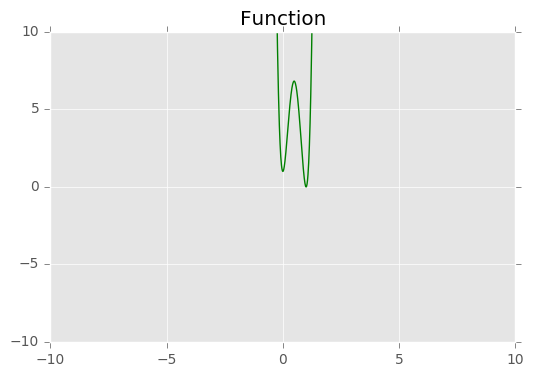

In [4]:
number_of_participles = 100
num_variables = 2
max_iteration = 500

a = np.empty((num_variables, number_of_participles))
v = np.empty((num_variables, number_of_participles))
pbest = np.empty((num_variables, number_of_participles))
gbest = np.empty((1, 2))
r = np.empty((number_of_participles))

for i in range(0, num_variables):
    for j in range(0, number_of_participles):
      pbest[i][j] = rand.randint(-20, 20)
      a[i][j] = pbest[i][j]
      v[i][j] = 0
  
for i in range(0, number_of_participles):
    r[i] = fitness(a[0][i], a[1][i])

pbest = np.sort(pbest)
r = np.sort(r)

gbest[0][0] = pbest[0][0]
gbest[0][1] = pbest[1][0]

plt.ion()
plt.style.use('ggplot')
fig = plt.figure()
plot = fig.add_subplot(111)
range_values = np.arange(-10.0, 10.0, 0.01)
plt.plot(range_values, fitness(range_values, range_values), color="green")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Function')

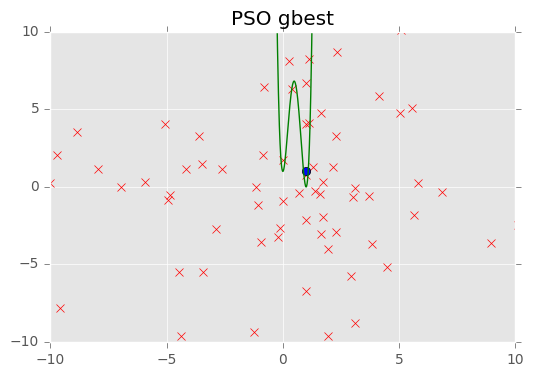

iteration: 1 - gbest: [[ 1.  1.]]


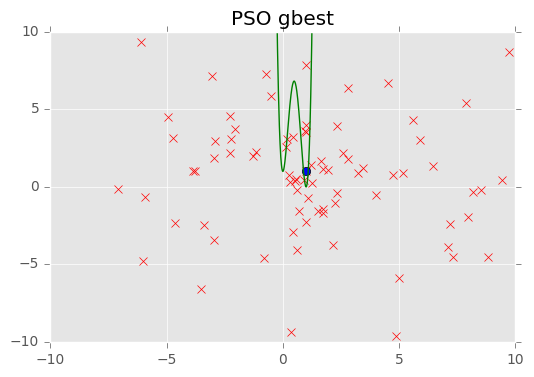

iteration: 5 - gbest: [[ 1.  1.]]


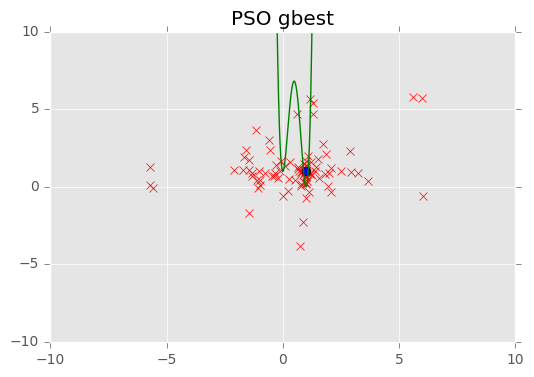

iteration: 15 - gbest: [[ 1.  1.]]


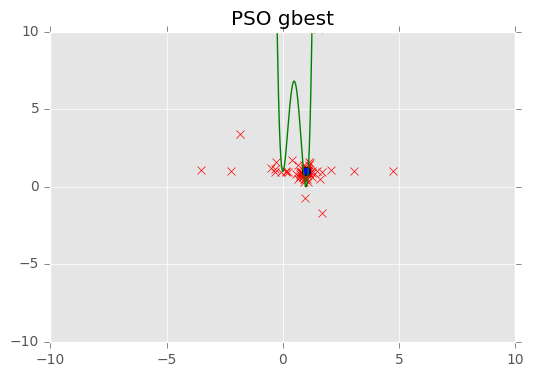

iteration: 30 - gbest: [[ 1.  1.]]


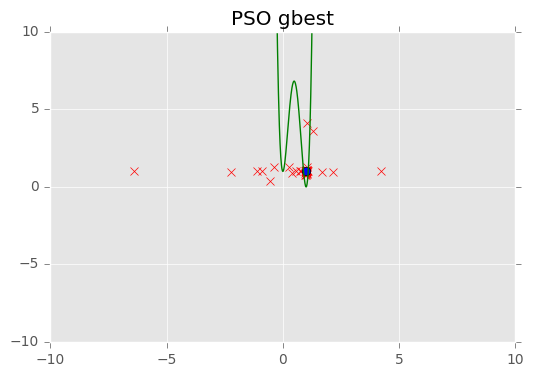

iteration: 50 - gbest: [[ 1.  1.]]


In [5]:
for step in [1, 5, 15, 30, 50]:
    for iteration in range(step):
        for i in range(number_of_participles):
          if(fitness(a[0][i], a[1][i]) < fitness(pbest[0][i], pbest[1][i])):
            pbest[0][i] = a[0][i]
            pbest[1][i] = a[1][i]
          if(fitness(pbest[0][i], pbest[1][i]) < fitness(gbest[0][0], gbest[0][1])):
            gbest[0][0] = pbest[0][i]
            gbest[0][1] = pbest[1][i]
        vector_velocity(number_of_participles, a, pbest, gbest, v)

    plt.plot(a[0], a[1], 'rx')
    plt.plot(gbest[0][0], gbest[0][1], "bo")
    plt.plot(range_values, fitness(range_values, range_values), color="green")
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title('PSO gbest')
    plt.show()
    print('iteration: ' + str(iteration+1) + ' - gbest: ' +str(gbest))